In [3]:
# Import essential libraries for data science
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib

# Load the cleaned malaria dataset
malaria_df = pd.read_csv("malaria_africa_cleaned.csv")

# Quick check to confirm data is loaded
print("Data shape:", malaria_df.shape)
malaria_df.head()


Data shape: (344, 14)


,Country,Year,No. of cases_estimated,No. of deaths_estimated,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region,No. of cases_reported,No. of deaths_reported,No. of cases
0,Algeria,2017,0,0,0,0.0,0.0,0,0.0,0.0,Africa,0.0,0.0,0.00
1,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa,3874892.0,13967.0,228.91
2,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa,1573163.0,2182.0,399.56
3,Botswana,2017,2989[2300-4200],7[0-20],2989,2300.0,4200.0,7,0.0,20.0,Africa,1900.0,17.0,2.05
4,Burkina Faso,2017,7907562[5645000-11330000],27791[25100-30500],7907562,5645000.0,11330000.0,27791,25100.0,30500.0,Africa,10225459.0,4144.0,399.94


In [4]:
print("Columns in the dataset:", malaria_df.columns.tolist())

Columns in the dataset: ['Country', 'Year', 'No. of cases_estimated', 'No. of deaths_estimated', 'No. of cases_median', 'No. of cases_min', 'No. of cases_max', 'No. of deaths_median', 'No. of deaths_min', 'No. of deaths_max', 'WHO Region', 'No. of cases_reported', 'No. of deaths_reported', 'No. of cases']


In [5]:
# Get info about the data (column types, non-null values, etc.)
malaria_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  344 non-null    object 
 1   Year                     344 non-null    int64  
 2   No. of cases_estimated   344 non-null    object 
 3   No. of deaths_estimated  344 non-null    object 
 4   No. of cases_median      344 non-null    int64  
 5   No. of cases_min         344 non-null    float64
 6   No. of cases_max         344 non-null    float64
 7   No. of deaths_median     344 non-null    int64  
 8   No. of deaths_min        344 non-null    float64
 9   No. of deaths_max        344 non-null    float64
 10  WHO Region               344 non-null    object 
 11  No. of cases_reported    344 non-null    float64
 12  No. of deaths_reported   344 non-null    float64
 13  No. of cases             344 non-null    float64
dtypes: float64(7), int64(3), o

In [6]:
print("Missing values per column:\n", malaria_df.isnull().sum())

Missing values per column:
 Country                    0
Year                       0
No. of cases_estimated     0
No. of deaths_estimated    0
No. of cases_median        0
No. of cases_min           0
No. of cases_max           0
No. of deaths_median       0
No. of deaths_min          0
No. of deaths_max          0
WHO Region                 0
No. of cases_reported      0
No. of deaths_reported     0
No. of cases               0
dtype: int64


In [7]:
features = [
    'Year',
    'No. of deaths_median',
    'No. of deaths_min',
    'No. of deaths_max',
    'No. of cases_reported',
    'No. of deaths_reported',
    'No. of cases'  # incidence per 1000 at-risk population
]

In [8]:
target = 'No. of cases_median'

In [9]:
# Define input features (X) and target (y)
X = malaria_df[features]
y = malaria_df[target]

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (344, 7)
Shape of target (y): (344,)


In [11]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Check accuracy
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE (Mean Absolute Error):", round(mae, 2))
print("RMSE (Root Mean Squared Error):", round(rmse, 2))
print("R² (R-squared):", round(r2, 3))


Model Evaluation:
MAE (Mean Absolute Error): 486606.14
RMSE (Root Mean Squared Error): 964428.69
R² (R-squared): 0.985


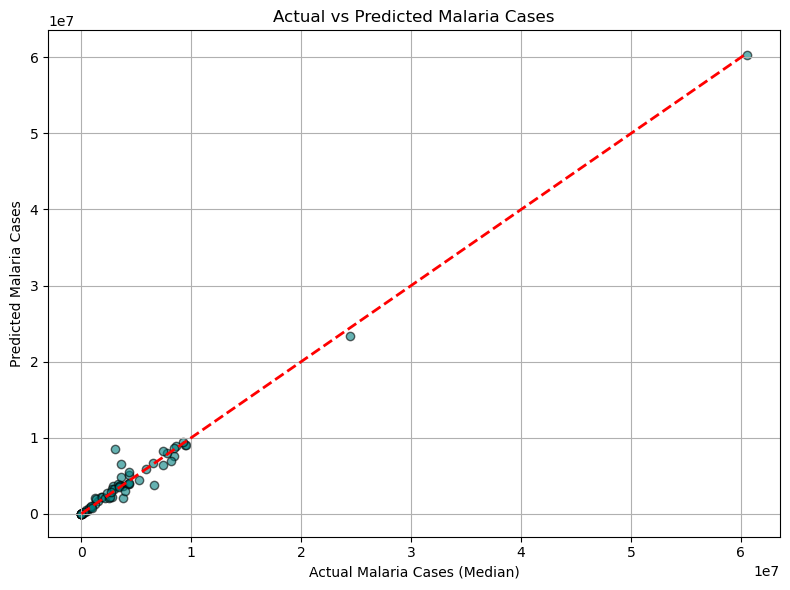

In [17]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', edgecolor='k')

# Add a diagonal reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

# Add labels and title
plt.xlabel('Actual Malaria Cases (Median)')
plt.ylabel('Predicted Malaria Cases')
plt.title('Actual vs Predicted Malaria Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

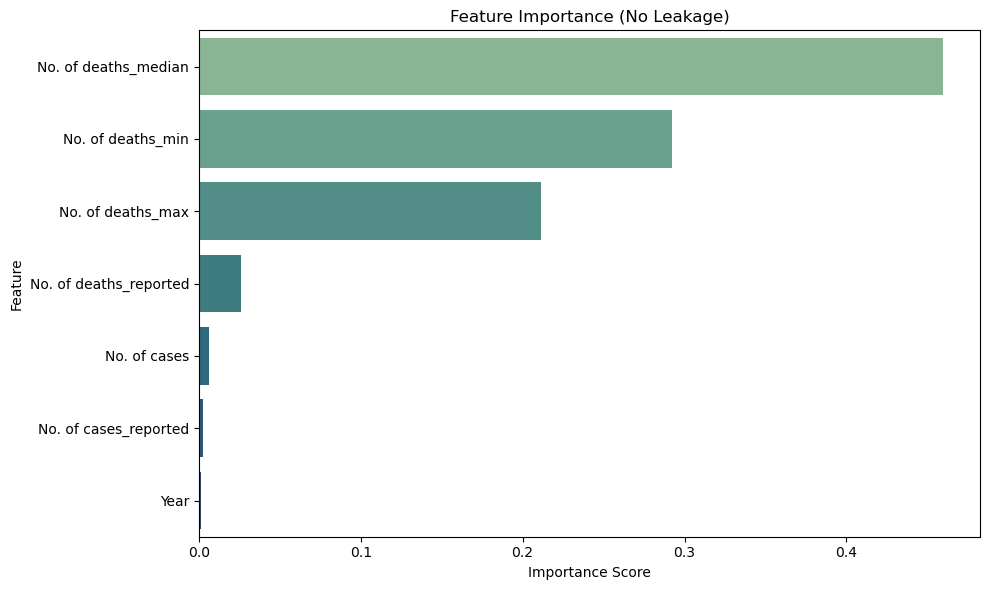

In [18]:
# Get feature importances from the trained model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='crest')
plt.title('Feature Importance (No Leakage)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [19]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'malaria_case_predictor_model.pkl')

print("Model saved as 'malaria_case_predictor_model.pkl'")

Model saved as 'malaria_case_predictor_model.pkl'


In [20]:
# Select a test row (e.g., Nigeria in 2016)
sample_row = malaria_df[(malaria_df['Country'] == 'Nigeria') & (malaria_df['Year'] == 2016)]

if not sample_row.empty:
    X_new = sample_row[features]
    y_actual = sample_row['No. of cases_median'].values[0]
    y_predicted = model.predict(X_new)[0]

    print("Prediction for Nigeria (2016):")
    print(f"Predicted malaria cases: {int(y_predicted):,}")
    print(f"Actual malaria cases (median): {int(y_actual):,}")
else:
    print("Nigeria 2016 data not found.")

Prediction for Nigeria (2016):
Predicted malaria cases: 52,668,697
Actual malaria cases (median): 52,357,005


In [21]:
import requests

# City and country of my choice
city = "Lagos"
country = "NG"  # Country code for Nigeria

# My OpenWeatherMap API key
api_key = "24ead9f3a98cc910403d4de435ac95fc"

# Build the API URL
url = f"http://api.openweathermap.org/data/2.5/weather?q={city},{country}&appid={api_key}&units=metric"

# Make the request
response = requests.get(url)

# Parse the JSON response
if response.status_code == 200:
    data = response.json()
    
    # Extract useful weather features
    temp = data['main']['temp']  # in Celsius
    humidity = data['main']['humidity']  # %
    weather_desc = data['weather'][0]['description']
    
    # Rainfall (optional – might not always be present)
    rainfall = data.get('rain', {}).get('1h', 0)

    # Show results
    print(f"Weather in {city}:")
    print(f"Temperature: {temp}°C")
    print(f"Humidity: {humidity}%")
    print(f"Rainfall (last hour): {rainfall} mm")
    print(f"Conditions: {weather_desc}")
else:
    print("Failed to fetch weather data:", response.status_code)


Weather in Lagos:
Temperature: 25.21°C
Humidity: 84%
Rainfall (last hour): 0 mm
Conditions: broken clouds
